<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#opset-version和算子" data-toc-modified-id="opset-version和算子-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>opset version和算子</a></span></li><li><span><a href="#使用onnx构建模型" data-toc-modified-id="使用onnx构建模型-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>使用onnx构建模型</a></span></li><li><span><a href="#参考" data-toc-modified-id="参考-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>参考</a></span></li></ul></div>

In [2]:
import onnx
from onnx import helper
from onnx import TensorProto

In [3]:
import onnxruntime as ort

In [5]:
import numpy as np

In [4]:
! pip list|grep torch

pytorch-lightning                 1.9.0
torch                             1.13.1
torchaudio                        0.13.0
torchmetrics                      0.11.0
torchvision                       0.14.1


## opset version和算子

In [32]:
!pip list|grep onnx

onnx                              1.13.1
onnxruntime                       1.14.1


onnx支持算子是根据版本迭代不断增加和更新的，当前最新已经到version 19。目前使用的onnx 1.13.1版本的python包最高支持version 18版本的算子。

每一个算子在哪一个版本开始支持，并且在不同的版本进行了怎么样的修改等说明都可以在[官网的说明](https://github.com/onnx/onnx/blob/main/docs/Operators.md)找到。比如Shape算子在1,13,15,19这几个版本新增或者更新，而算子的输出是一个1维的int64类型的张量。

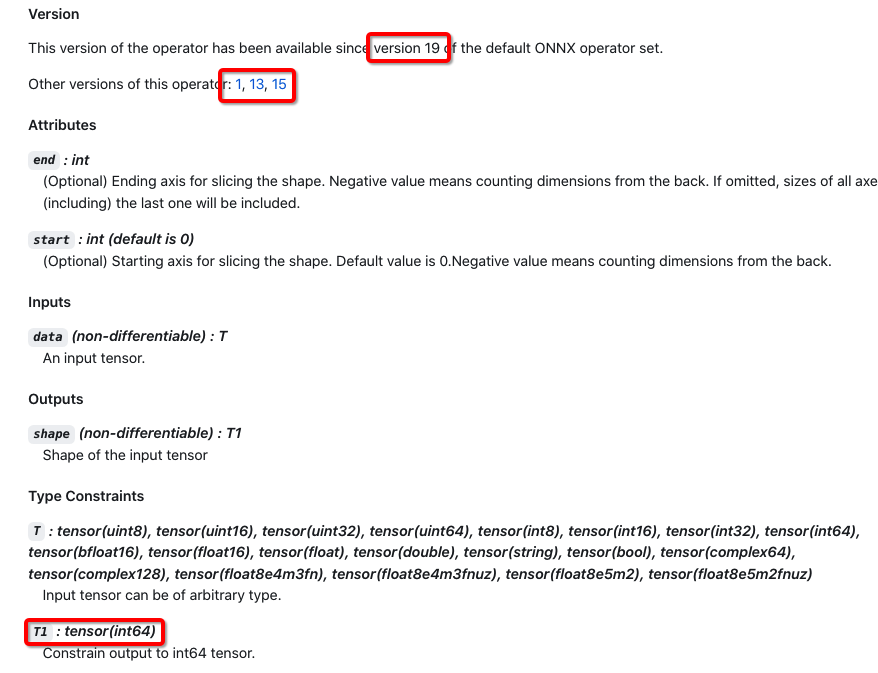

## 使用onnx构建模型

基于onnx实现一个线性函数`y=a*x+b`，输入类型为int，大小为`2*3`

In [17]:
# 定义张量
a = helper.make_tensor_value_info("a", TensorProto.INT32, [2, 2])
x = helper.make_tensor_value_info("x", TensorProto.INT32, [2, 2])
b = helper.make_tensor_value_info("b", TensorProto.INT32, [2, 2])
y = helper.make_tensor_value_info("y", TensorProto.INT32, [2, 2])

In [18]:
# 定义算子
node_mul = helper.make_node("Mul", ["a", "x"], ["c"])
node_add = helper.make_node("Add", ["c", "b"], ["y"])

In [19]:
# 定义计算图
graph = helper.make_graph([node_mul, node_add], "linear_func", [a, x, b], [y])

In [20]:
# 定义模型
model = helper.make_model(graph)

In [21]:
onnx.checker.check_model(model)
onnx.save(model, "linear_func.onnx")

In [22]:
print(model)

ir_version: 8
graph {
  node {
    input: "a"
    input: "x"
    output: "c"
    op_type: "Mul"
  }
  node {
    input: "c"
    input: "b"
    output: "y"
    op_type: "Add"
  }
  name: "linear_func"
  input {
    name: "a"
    type {
      tensor_type {
        elem_type: 6
        shape {
          dim {
            dim_value: 2
          }
          dim {
            dim_value: 2
          }
        }
      }
    }
  }
  input {
    name: "x"
    type {
      tensor_type {
        elem_type: 6
        shape {
          dim {
            dim_value: 2
          }
          dim {
            dim_value: 2
          }
        }
      }
    }
  }
  input {
    name: "b"
    type {
      tensor_type {
        elem_type: 6
        shape {
          dim {
            dim_value: 2
          }
          dim {
            dim_value: 2
          }
        }
      }
    }
  }
  output {
    name: "y"
    type {
      tensor_type {
        elem_type: 6
        shape {
          dim {
            d

In [31]:
# 需要显式指定数据类型，以匹配onnx的定义
input_a = np.arange(4, dtype=np.int32).reshape(2, 2)
input_x = np.ones((2, 2), dtype=np.int32)
input_b = np.ones((2, 2), dtype=np.int32)

In [30]:
session = ort.InferenceSession("linear_func.onnx")
session.run(None, {"a": input_a, "x": input_x, "b": input_b})

[array([[1, 2],
        [3, 4]], dtype=int32)]

## 参考

+ https://zhuanlan.zhihu.com/p/516920606
+ https://github.com/onnx/onnx/blob/main/onnx/onnx.proto
+ https://zhuanlan.zhihu.com/p/346511883